# Conditional Spectrum (CS) Based Record Selection
Created on: 26/08/2021

Updated on: 20/05/2022

Author: Volkan Ozsarac

Affiliation: University School for Advanced Studies IUSS Pavia

Earthquake Engineering PhD Candidate

email:  volkan.ozsarac@iusspavia.it

In [1]:
from EzGM.selection import conditional_spectrum
from EzGM.utility import check_gmpe_attributes, get_esm_token, run_time
from time import time
import numpy as np

## A) Example using NGA_W2 database, M = Sa(T*), and single scenario

In [2]:
# Acquire the run start time
start_time = time()

### 1) Initialize the conditional_spectrum object for record selection, check which parameters are required for the gmpe you are using.

In [3]:
# Initialize the object
cs = conditional_spectrum(database='NGA_W2', outdir='Outputs_A')

# Check attributes of ground motion prediction equation BooreEtAl2014
check_gmpe_attributes(gmpe='AkkarEtAlRjb2014')

GMPE name: AkkarEtAlRjb2014
Supported tectonic region: ACTIVE_SHALLOW_CRUST
Supported standard deviation: Intra event, Inter event, Total
Supported intensity measure: SA, PGA, PGV
Supported intensity measure component: GEOMETRIC_MEAN
Supported SA period range: 0.01 - 4.0
Required distance parameters: rjb
Required rupture parameters: mag, rake
Required site parameters: vs30


### 2) Create target spectrum

Target spectrum is created.


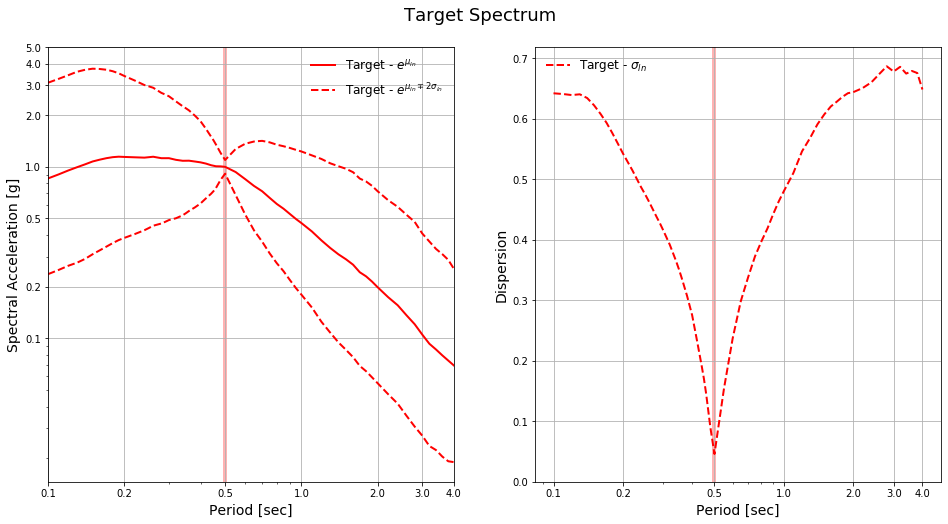

In [4]:
# Note that intensity measure component is GEOMETRIC_MEAN:Geometric mean of two horizontal components
cs.create(Tstar=0.5, gmpe='AkkarEtAlRjb2014', selection=2, Sa_def='GeoMean', 
          site_param={'vs30': 500}, rup_param={'rake': [0.0], 'mag': [7.5]},
          dist_param={'rjb': [10]}, Hcont=None, T_Tgt_range=[0.1, 4.0],
          im_Tstar=1.0, epsilon=None, cond=1, useVar=1, corr_func='akkar')

# Target spectrum can be plotted at this stage
cs.plot(tgt=1, sim=0, rec=0, save=1, show=1)

### 3) Select the ground motions

Ground motion selection is finished.
For T ∈ [0.10 - 4.00]
Max error in median = 3.03 %
Max error in standard deviation = 0.16 %
The errors are within the target 10 percent %


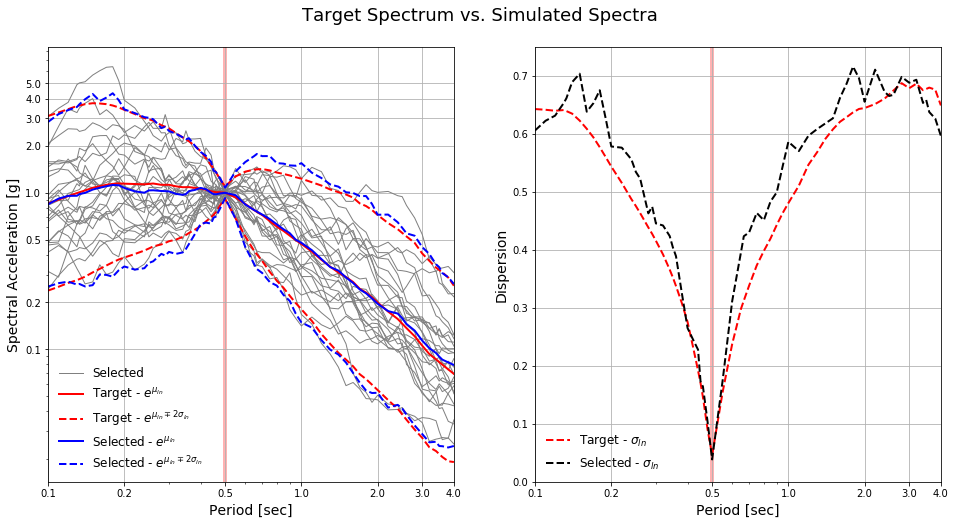

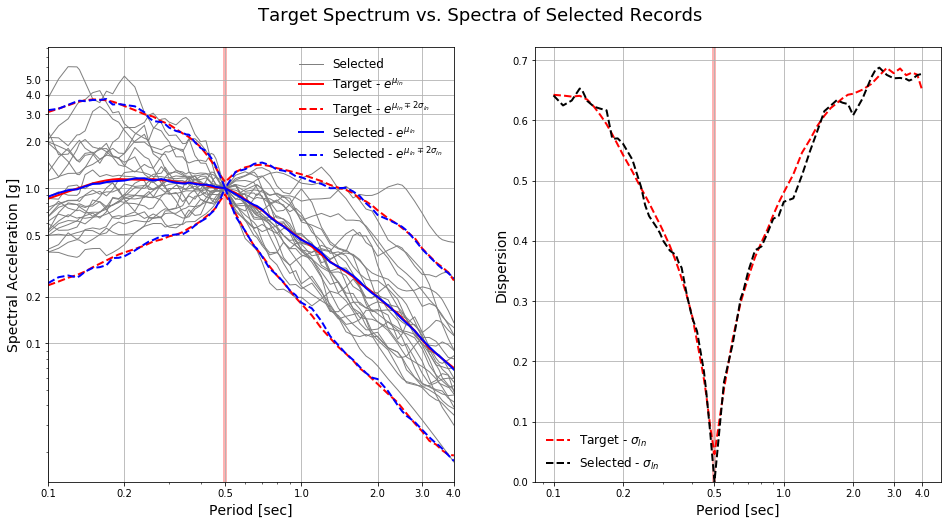

In [5]:
cs.select(nGM=25, isScaled=1, maxScale=4, nTrials=20,
          weights=[1, 2, 0.3], seedValue=0, nLoop=2, penalty=1, tol=10,
          Mw_lim=[5.5, 8], Vs30_lim=[360, 760], Rjb_lim=[0, 50], fault_lim=None)

# The simulated spectra and spectra of selected records can be plotted at this stage
cs.plot(tgt=0, sim=1, rec=1, save=1, show=1)

### 4) If database == 'NGA_W2' you can first download the records via nga_download method from NGA-West2 Database [http://ngawest2.berkeley.edu/] and then use write method. If you already have record database elsewhere you can ignore and comment this part

In [6]:
# You should enter correct credentials to download the records
cs.ngaw2_download(username = 'example_username@email.com', pwd = 'example_password123456', sleeptime = 2, browser = 'firefox')


Started executing ngaw2_download method...
Getting the webdriver to use...
Webdriver is obtained successfully.
Signing in with credentials...
Signed in successfully.
Listing the Records...
Search was successfully created. Please allow time to render the graphics.
You are downloading the UNSCALED, PROCESSED, AS-RECORDED (unrotated) displacement, velocity and acceleration trace files. The scale factors determined using the on-line tool are given in the csv file accompanying the trace files! The users of the PEER-NGA databases, flatfiles, models and reports are requested to acknowledge the Pacific Earthquake Engineering Research Center (PEER) in their work and publications.
Please allow a few seconds of apparent inactivity for the download to complete. The wait time depends on the number of records being downloaded and the network speed. Wait until your browser indicates that it has completed the download!
Finishing in 4 ...
Finishing in 3 ...
Finishing in 2 ...
Finishing in 1 ...
Finish

### 5) If you have records already inside recs_f\database.zip\database or downloaded records for database = NGA_W2 case, write whatever you want, the object itself, selected and scaled time histories

In [7]:
cs.write(obj=1, recs=1, recs_f='')

Finished writing process, the files are located in
/home/volkan/Desktop/EzGM/Examples/binder/Outputs_A


In [8]:
# Calculate the total time passed
run_time(start_time)

Run time: 0 hours: 1 minutes: 15.55 seconds


## B) Example using ESM_2018 database, M = Sa(T*), and single scenario

In [9]:
# Acquire the run start time
start_time = time()

Before using esm2018_download method, make sure that the access token has placed in the current working directory as token.txt.
Otherwise, retrieve access token, this can be done using cs.get_esm_token as well, later on at step 4). 

In [10]:
get_esm_token(username = 'example_username@email.com', pwd = 'example_password123456')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   866  100   649  100   217    880    294 --:--:-- --:--:-- --:--:--  1173


### 1) Initialize the conditional_spectrum object for record selection, check which parameters are required for the gmpe you are using.

In [11]:
cs = conditional_spectrum(database='ESM_2018', outdir='Outputs_B')

### 2) Create target spectrum

Target spectrum is created.


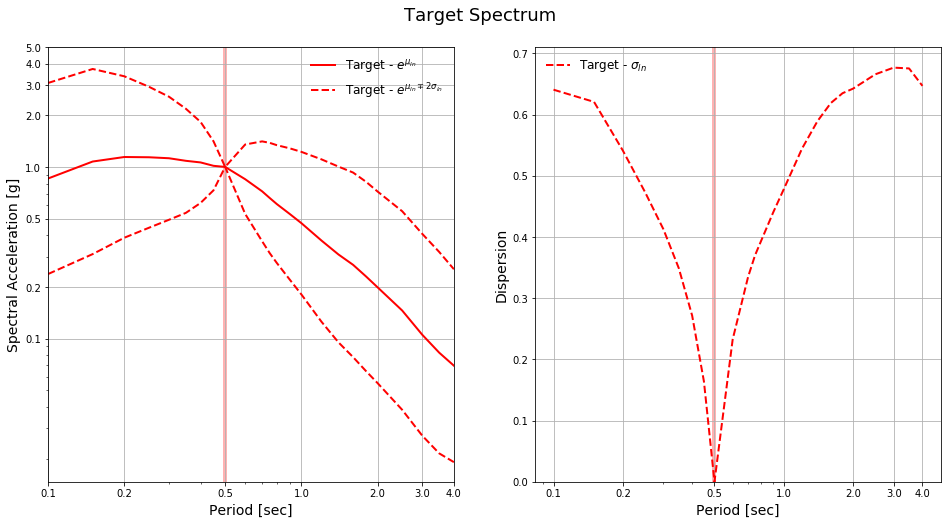

In [12]:
# Note that intensity measure component is GEOMETRIC_MEAN:Geometric mean of two horizontal components
cs.create(Tstar=0.5, gmpe='AkkarEtAlRjb2014', selection=2, Sa_def='GeoMean', 
          site_param={'vs30': 500}, rup_param={'rake': [0.0], 'mag': [7.5]},
          dist_param={'rjb': [10]}, Hcont=None, T_Tgt_range=[0.1, 4.0],
          im_Tstar=1.0, epsilon=None, cond=1, useVar=1, corr_func='akkar')

# Target spectrum can be plotted at this stage
cs.plot(tgt=1, sim=0, rec=0, save=1, show=1)

### 3) Select the ground motions

Ground motion selection is finished.
For T ∈ [0.10 - 4.00]
Max error in median = 0.70 %
Max error in standard deviation = 4.64 %
The errors are within the target 10 percent %


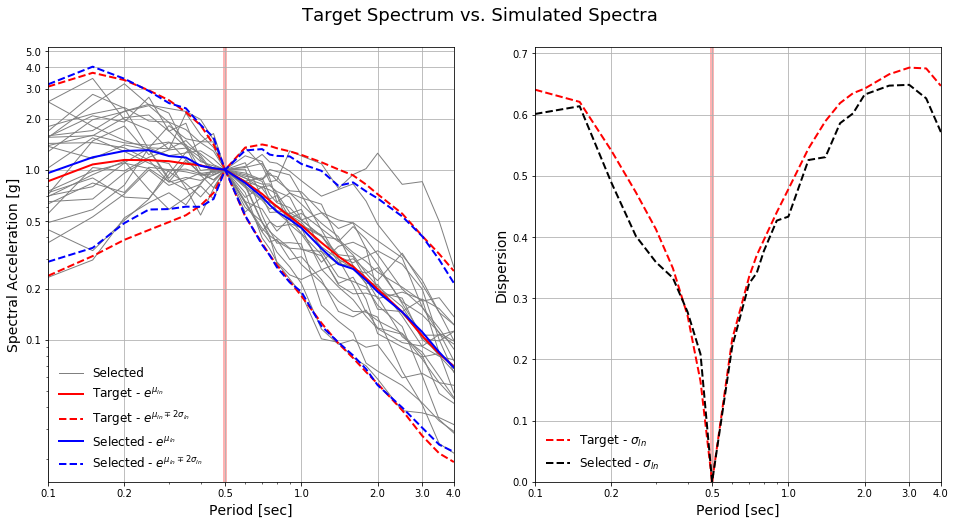

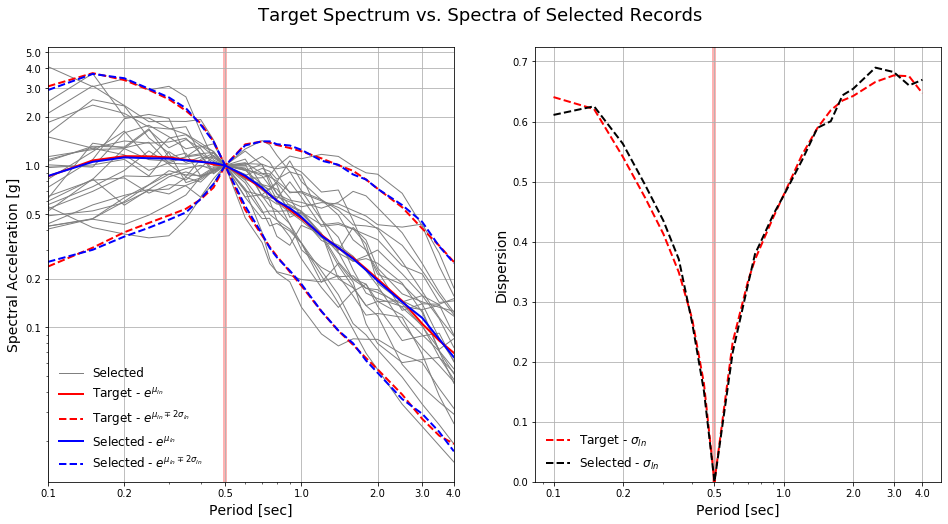

In [13]:
cs.select(nGM=25, isScaled=1, maxScale=4,
          Mw_lim=None, Vs30_lim=None, Rjb_lim=None, fault_lim=None, nTrials=20,
          weights=[1, 2, 0.3], seedValue=0, nLoop=2, penalty=1, tol=10)

# The simulated spectra and spectra of selected records can be plotted at this stage
cs.plot(tgt=0, sim=1, rec=1, save=1, show=1)

### 4) If database == 'ESM_2018' you can first download the records via nga_download method from ESM_2018 database [https://esm-db.eu] and then use write method. If you already have record database elsewhere you can ignore and comment this part

In [14]:
cs.esm2018_download()


Started executing esm2018_download method...
Downloaded files are located in
/home/volkan/Desktop/EzGM/Examples/binder/Outputs_B/unscaled_records_2022_5_20_12_9_44_4_140_0.zip


### 5.) If you have records already inside recs_f\database.zip\database or downloaded records for the database = ESM_2018 case, write whatever you want, the object itself, selected and scaled time histories

In [15]:
cs.write(obj=1, recs=1, recs_f='')

Finished writing process, the files are located in
/home/volkan/Desktop/EzGM/Examples/binder/Outputs_B


In [16]:
# Calculate the total time passed
run_time(start_time)

Run time: 0 hours: 0 minutes: 46.13 seconds


## B) Example using NGA_W2 database, IM = AvgSa(T*), and two scenarios

In [17]:
# Acquire the run start time
start_time = time()

### 1) Initialize the conditional_spectrum object for record selection, check which parameters are required for the gmpe you are using.

In [18]:
# initialize the object
cs = conditional_spectrum(database='NGA_W2', outdir='Outputs_C')

# Check attributes of ground motion prediction equation BooreEtAl2014
check_gmpe_attributes(gmpe='BooreEtAl2014')

GMPE name: BooreEtAl2014
Supported tectonic region: ACTIVE_SHALLOW_CRUST
Supported standard deviation: Intra event, Inter event, Total
Supported intensity measure: SA, PGA, PGV
Supported intensity measure component: RotD50
Supported SA period range: 0.01 - 10.0
Required distance parameters: rjb
Required rupture parameters: mag, rake
Required site parameters: vs30


### 2) Create target spectrum

Target spectrum is created.


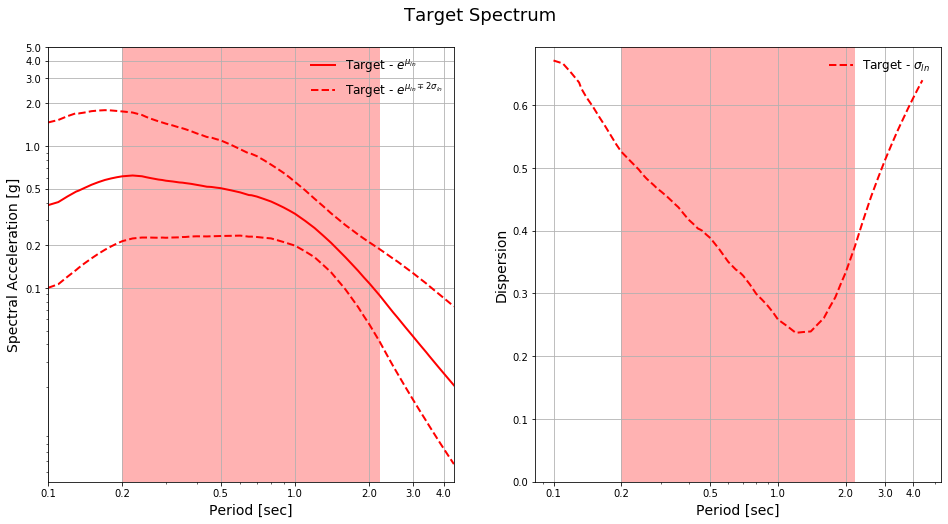

In [19]:
# Note that intensity measure component is RotD50
cs.create(Tstar=np.arange(0.2, 2.4, 0.2), gmpe='BooreEtAl2014', selection=2, Sa_def='RotD50', 
          site_param={'vs30': 620}, rup_param={'rake': [0.0, 0.0], 'mag': [6.5, 6.0]},
          dist_param={'rjb': [20, 30]}, Hcont=None, T_Tgt_range=[0.1, 4.5],
          im_Tstar=0.25, epsilon=None, cond=1, useVar=1, corr_func='baker_jayaram')

# Target spectrum can be plotted at this stage
cs.plot(tgt=1, sim=0, rec=0, save=1, show=1)

### 3) Select the ground motions

Ground motion selection is finished.
For T ∈ [0.10 - 4.40]
Max error in median = 5.10 %
Max error in standard deviation = 11.26 %


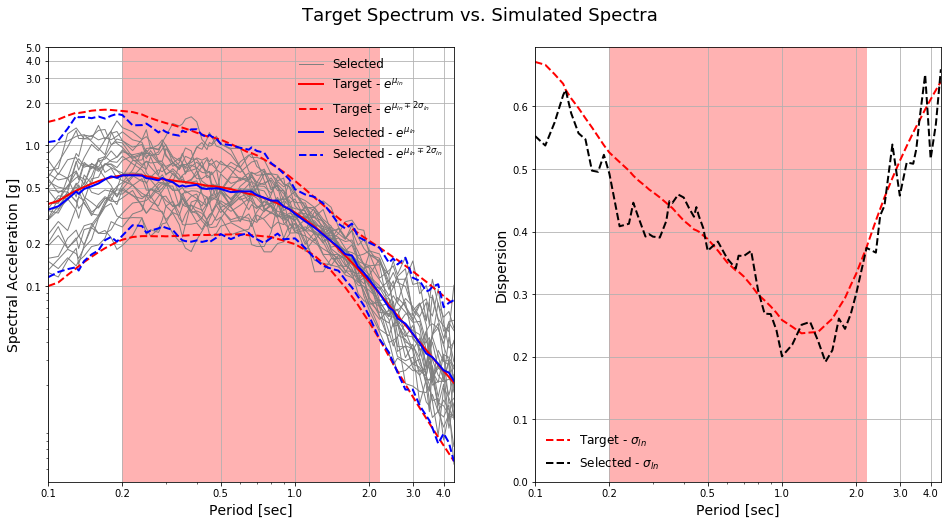

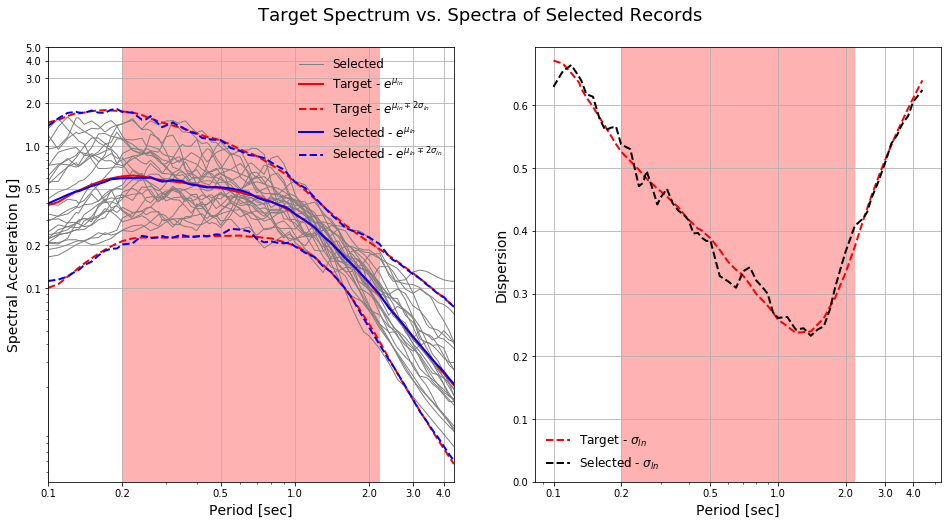

In [20]:
cs.select(nGM=25, isScaled=1, maxScale=4,
          Mw_lim=[5.5,8], Vs30_lim=[360,760], Rjb_lim=[0,50], fault_lim=None, nTrials=20,
          weights=[1, 2, 0.3], seedValue=0, nLoop=2, penalty=1, tol=10)

# The simulated spectra and spectra of selected records can be plotted at this stage
cs.plot(tgt=0, sim=1, rec=1, save=1, show=1)

### 4) If database == 'NGA_W2' you can first download the records via nga_download method from NGA-West2 Database [http://ngawest2.berkeley.edu/] and then use write method. If you already have record database elsewhere you can ignore and comment this part

In [21]:
# You should enter correct credentials to download the records
cs.ngaw2_download(username = 'example_username@email.com', pwd = 'example_password123456', sleeptime = 2, browser = 'chrome')


Started executing ngaw2_download method...
Getting the webdriver to use...
Webdriver is obtained successfully.
Signing in with credentials...
Signed in successfully.
Listing the Records...
Search was successfully created. Please allow time to render the graphics.
You are downloading the UNSCALED, PROCESSED, AS-RECORDED (unrotated) displacement, velocity and acceleration trace files. The scale factors determined using the on-line tool are given in the csv file accompanying the trace files! The users of the PEER-NGA databases, flatfiles, models and reports are requested to acknowledge the Pacific Earthquake Engineering Research Center (PEER) in their work and publications.
Please allow a few seconds of apparent inactivity for the download to complete. The wait time depends on the number of records being downloaded and the network speed. Wait until your browser indicates that it has completed the download!
Finishing in 4 ...
Finishing in 3 ...
Finishing in 2 ...
Finishing in 1 ...
Finish

### 5) If you have records already inside recs_f\database.zip\database or downloaded records for database = NGA_W2 case, write whatever you want, the object itself, selected and scaled time histories

In [22]:
cs.write(obj=1, recs=1, recs_f='')

Finished writing process, the files are located in
/home/volkan/Desktop/EzGM/Examples/binder/Outputs_C


In [23]:
# Calculate the total time passed
run_time(start_time)

Run time: 0 hours: 0 minutes: 58.53 seconds
